In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/statlog_heart/heart_data.csv')
df = df.rename(columns={'heart_disease': 'target'})


In [2]:
print(df.shape)

(270, 14)


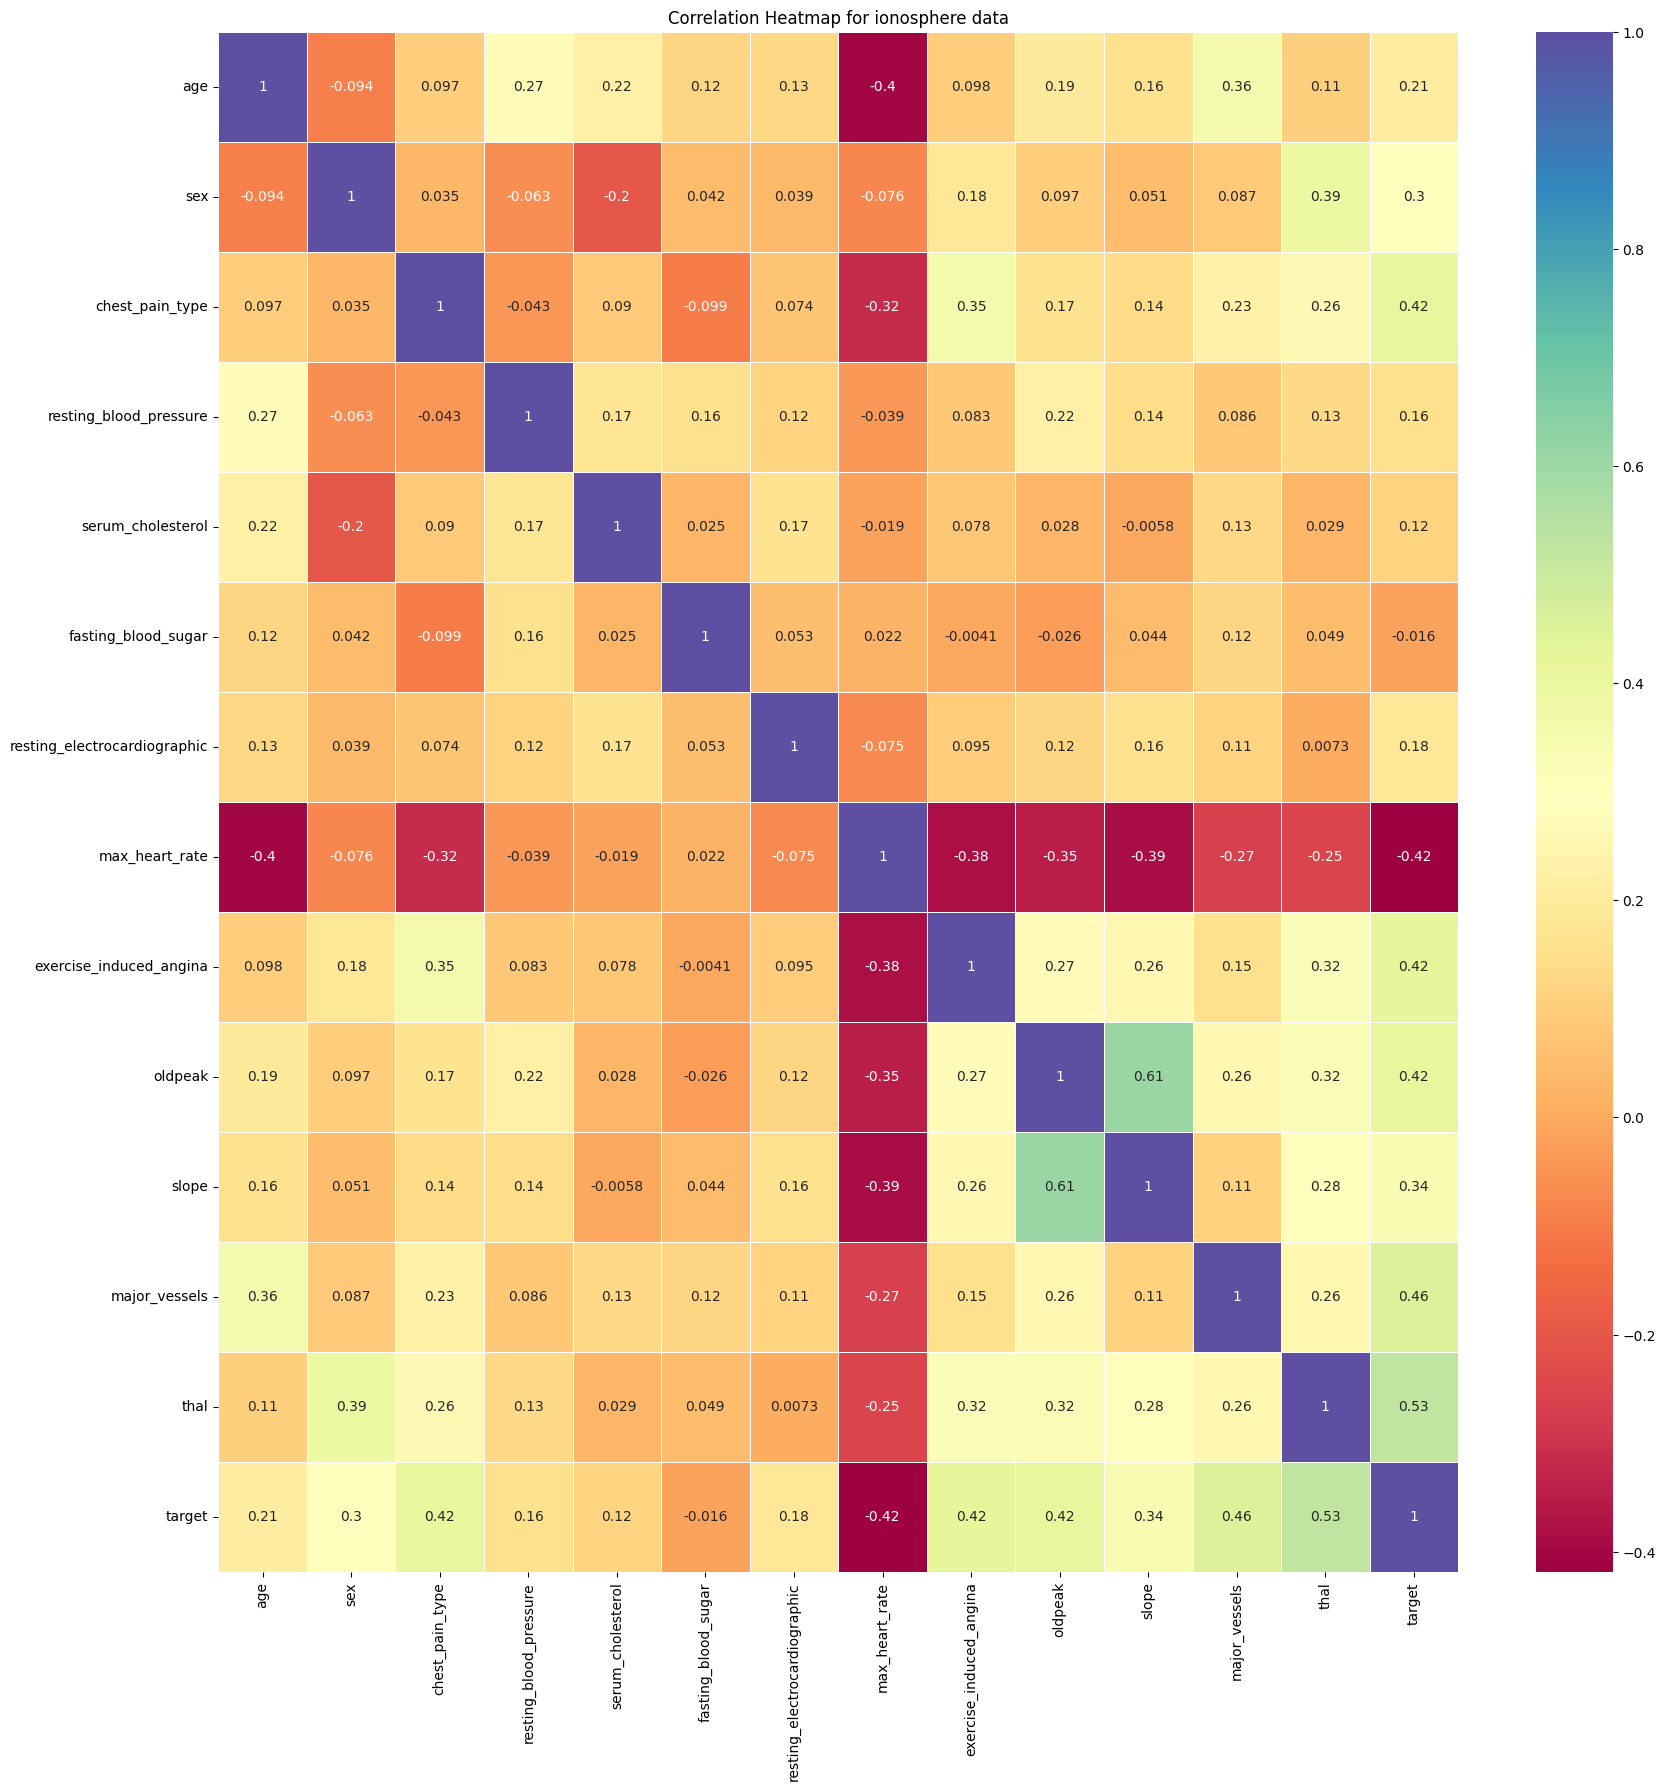

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="Spectral", linewidths=0.4)
plt.title("Correlation Heatmap for ionosphere data")
plt.show()

In [4]:
threshold = 0.23
correlations_with_class = corr_matrix['target']
features_to_keep = correlations_with_class[abs(correlations_with_class) > threshold].index
_df = df[features_to_keep]

print("Features being kept:",  list(features_to_keep))
print("Total Features: ", len(df.columns))
print("# of Features dropped:", len(df.columns) - len(_df.columns))

df = _df

Features being kept: ['sex', 'chest_pain_type', 'max_heart_rate', 'exercise_induced_angina', 'oldpeak', 'slope', 'major_vessels', 'thal', 'target']
Total Features:  14
# of Features dropped: 5


In [5]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = MinMaxScaler(feature_range=(-np.pi, np.pi))
X = scaler.fit_transform(X)
y = np.array(y).reshape(-1, 1)

print(X.shape, y.shape)


(270, 8) (270, 1)


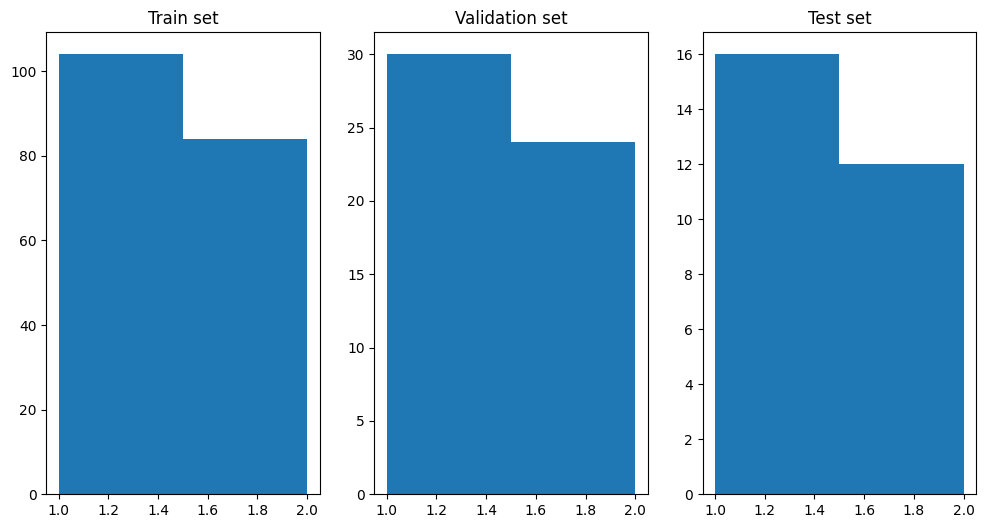

[-] Data split into 188 training samples, 54 validation samples, and 28 test samples


In [6]:
from src.experiment import Experiment

experiment1_zz = Experiment(X.shape[1], experiment_name="t1_zz")
experiment1_zz.split_data(X, y, use_sample=False,verbose=True)


In [7]:
from qiskit.circuit.library import PauliFeatureMap, ZZFeatureMap

In [8]:
zz_feature_map = ZZFeatureMap(
    feature_dimension=experiment1_zz.X_train.shape[1], 
    reps=2)
pauli_feature_map = PauliFeatureMap(
    feature_dimension=experiment1_zz.X_train.shape[1], 
    reps=2, paulis=["Z", "YY"], 
    entanglement="full"
)


In [9]:
from src.ansatz import *

In [19]:
# print(zz_feature_map._base_name)
# print(pauli_feature_map._base_name)

[+] Running experiment with ZZ Feature Map...
   [>] Skipping training for ZZFeatureMap, ansatz_1 with 1 repetitions
   [>] Skipping training for ZZFeatureMap, ansatz_1 with 2 repetitions
   [>] Skipping training for ZZFeatureMap, ansatz_1 with 3 repetitions
   [>] Skipping training for ZZFeatureMap, ansatz_2 with 1 repetitions
   [>] Skipping training for ZZFeatureMap, ansatz_2 with 2 repetitions
   [>] Skipping training for ZZFeatureMap, ansatz_2 with 3 repetitions
   [>] Skipping training for ZZFeatureMap, ansatz_3 with 1 repetitions
   [>] Skipping training for ZZFeatureMap, ansatz_3 with 2 repetitions
   [>] Skipping training for ZZFeatureMap, ansatz_3 with 3 repetitions
   [>] Skipping training for ZZFeatureMap, ansatz_4 with 1 repetitions
   [>] Skipping training for ZZFeatureMap, ansatz_4 with 2 repetitions
   [>] Skipping training for ZZFeatureMap, ansatz_4 with 3 repetitions


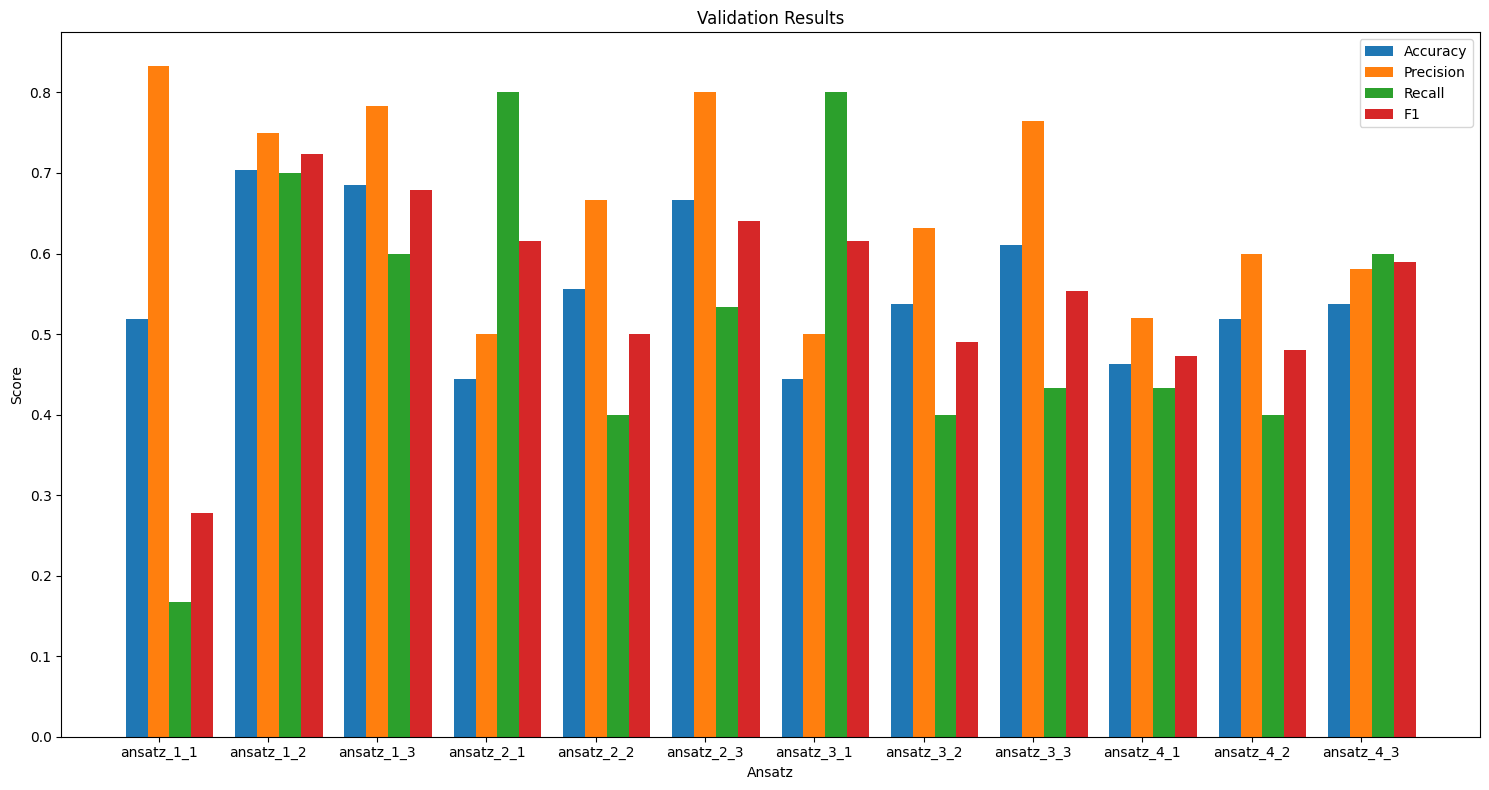

In [11]:
print("[+] Running experiment with ZZ Feature Map...")
experiment1_zz.run_experiment(zz_feature_map, [ansatz_1, ansatz_2, ansatz_3, ansatz_4], max_reps=3)
experiment1_zz.plot_results()

In [12]:
test_results = experiment1_zz.evaluate_best_on_test()

[-] Evaluating best model on test set: {'ansatz': 'ansatz_1', 'feature_map': 'ZZFeatureMap', 'reps': 2, 'accuracy': 0.704, 'precision': 0.75, 'recall': 0.7, 'f1': 0.724, 'time': 177.812}


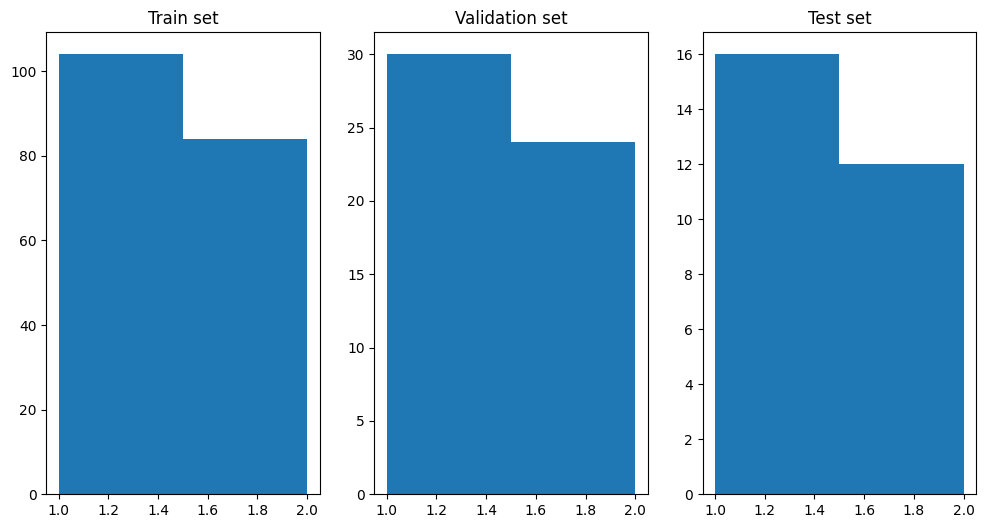

[-] Data split into 188 training samples, 54 validation samples, and 28 test samples


In [22]:
experiment1_pauli = Experiment(X.shape[1], experiment_name="t1_pauli")
experiment1_pauli.split_data(X, y, use_sample=False,verbose=True)


[+] Training ansatz_1 with 1 repetitions
[+] Validation results for ansatz_1 with 1 repetitions:
   [>] Accuracy: 0.48148148148148145
[+] Training ansatz_1 with 2 repetitions
[+] Validation results for ansatz_1 with 2 repetitions:
   [>] Accuracy: 0.7222222222222222
[+] Training ansatz_1 with 3 repetitions
[+] Validation results for ansatz_1 with 3 repetitions:
   [>] Accuracy: 0.6481481481481481
[+] Training ansatz_2 with 1 repetitions
[+] Validation results for ansatz_2 with 1 repetitions:
   [>] Accuracy: 0.5185185185185185
[+] Training ansatz_2 with 2 repetitions
[+] Validation results for ansatz_2 with 2 repetitions:
   [>] Accuracy: 0.5925925925925926
[+] Training ansatz_2 with 3 repetitions
[+] Validation results for ansatz_2 with 3 repetitions:
   [>] Accuracy: 0.7037037037037037
[+] Training ansatz_3 with 1 repetitions
[+] Validation results for ansatz_3 with 1 repetitions:
   [>] Accuracy: 0.5555555555555556
[+] Training ansatz_3 with 2 repetitions
[+] Validation results for 

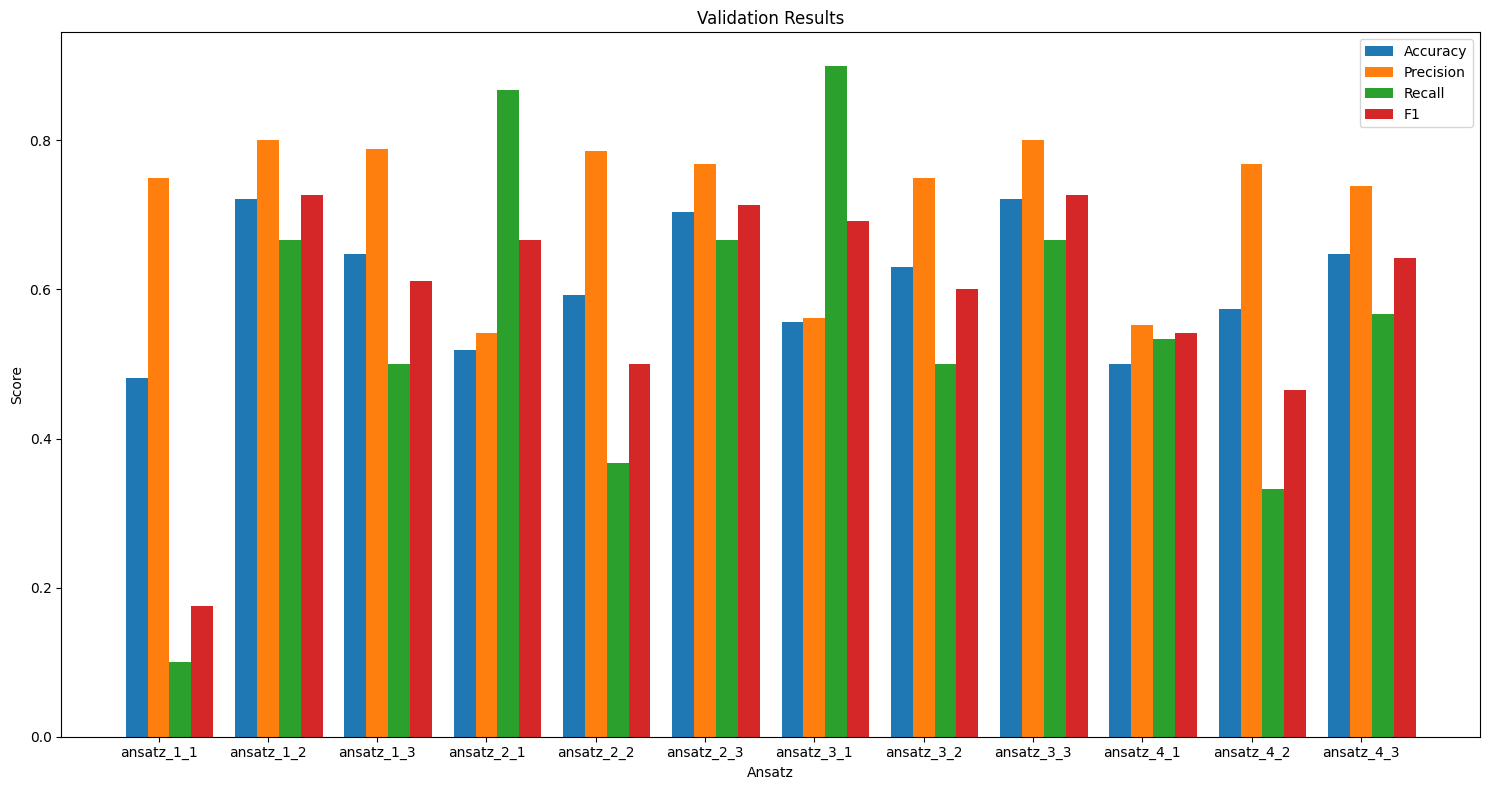

In [23]:
experiment1_pauli.run_experiment(pauli_feature_map, [ansatz_1, ansatz_2, ansatz_3, ansatz_4], max_reps=3)
experiment1_pauli.plot_results()

In [24]:
experiment1_pauli.evaluate_best_on_test()

[-] Evaluating best model on test set: {'ansatz': 'ansatz_1', 'feature_map': 'PauliFeatureMap', 'reps': 2, 'accuracy': 0.722, 'precision': 0.8, 'recall': 0.667, 'f1': 0.727, 'time': 284.023}


{'ansatz': 'ansatz_1',
 'feature_map': 'PauliFeatureMap',
 'reps': 2,
 'accuracy': 0.607,
 'precision': 0.692,
 'recall': 0.562,
 'f1': 0.621,
 'time': 324.393}